In [1]:
# The dataset gives us electronics sales data at Amazon. 

# It contains user ratings for various electronics items sold, along with category of each item and time of sell.



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Importing Dataset 

df = pd.read_csv("electronics.csv")
df.head(5)

,item_id,user_id,rating,timestamp,model_attr,category,brand,year,user_attr,split
0,0,0,5.0,1999-06-13,Female,Portable Audio & Video,NaN,1999,NaN,0
1,0,1,5.0,1999-06-14,Female,Portable Audio & Video,NaN,1999,NaN,0
2,0,2,3.0,1999-06-17,Female,Portable Audio & Video,NaN,1999,NaN,0
3,0,3,1.0,1999-07-01,Female,Portable Audio & Video,NaN,1999,NaN,0
4,0,4,2.0,1999-07-06,Female,Portable Audio & Video,NaN,1999,NaN,0


In [6]:
df.shape


(1292954, 10)

In [7]:
# It is also a good practice to know the columns and their corresponding data types
# along with finding whether they contain null values or not.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1292954 entries, 0 to 1292953
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   item_id     1292954 non-null  int64  
 1   user_id     1292954 non-null  int64  
 2   rating      1292954 non-null  float64
 3   timestamp   1292954 non-null  object 
 4   model_attr  1292954 non-null  object 
 5   category    1292954 non-null  object 
 6   brand       331120 non-null   object 
 7   year        1292954 non-null  int64  
 8   user_attr   174124 non-null   object 
 9   split       1292954 non-null  int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 98.6+ MB


In [12]:
# We can also see that the column Timestamp is of int64 data type, but it is actually a timestamp.

# We can convert it to a timestamp using the following code:

from datetime import datetime

df['timestamp'] = pd.to_datetime(df['timestamp'])

In [13]:
# We can also see that the column Brand is of object data type, but it is actually a string.

# We can convert it to a string using the following code:
df['brand'] = df['brand'].astype(str)

In [14]:
# We can also see that the column User ID is of int64 data type, but it is actually a string.

# We can convert it to a string using the following code:

df['user_id'] = df['user_id'].astype(str)

In [15]:
# we can also see the statistical summary of the dataset.

df.describe()

,item_id,rating,timestamp,year,split
count,1.292954e+06,1.292954e+06,1292954,1.292954e+06,1.292954e+06
mean,4.183588e+03,4.051482e+00,2015-06-18 11:30:34.851355904,2.012938e+03,1.747587e-01
min,0.000000e+00,1.000000e+00,1999-06-13 00:00:00,1.999000e+03,0.000000e+00
25%,2.018000e+03,4.000000e+00,2014-09-06 00:00:00,2.012000e+03,0.000000e+00
50%,3.930000e+03,5.000000e+00,2015-10-19 00:00:00,2.014000e+03,0.000000e+00
75%,6.289000e+03,5.000000e+00,2016-10-19 00:00:00,2.015000e+03,0.000000e+00
max,9.559000e+03,5.000000e+00,2018-10-01 00:00:00,2.018000e+03,2.000000e+00
std,2.525346e+03,1.379732e+00,NaN,2.643513e+00,5.506810e-01


In [16]:
# We can print columns 
df.columns

Index(['item_id', 'user_id', 'rating', 'timestamp', 'model_attr', 'category',
       'brand', 'year', 'user_attr', 'split'],
      dtype='object')

In [17]:
# the statistical summary of the dataset gives us the following information:

# 1. The mean rating is 4.

# 2. The minimum rating is 1.

# 3. The maximum rating is 5.

In [18]:
# We can also see the number of unique users and items in the dataset.

df.nunique()

item_id          9560
user_id       1157633
rating              5
timestamp        6354
model_attr          3
category           10
brand              51
year               20
user_attr           2
split               3
dtype: int64

In [19]:
# check for duplicated

df.duplicated().sum()

0

In [23]:
# Check for Missing values
df.isnull().sum()

item_id             0
user_id             0
rating              0
timestamp           0
model_attr          0
category            0
brand               0
year                0
user_attr     1118830
split               0
dtype: int64

In [21]:
# the distribution of ratings

df['rating'].value_counts()

rating
5.0    755755
4.0    214166
1.0    143755
3.0    100630
2.0     78648
Name: count, dtype: int64

In [25]:
# what was the best year of sales
df['year'] = pd.DatetimeIndex(df['timestamp']).year

df['year'].value_counts()

year
2015    320887
2016    302619
2017    192477
2014    180676
2013     99855
2018     80229
2012     38389
2011     23894
2010     16888
2009     12804
2008      9428
2007      6798
2006      2614
2005      2170
2004      1275
2003       833
2002       481
2001       403
2000       187
1999        47
Name: count, dtype: int64

In [ ]:
# 2015 was the best year of sales

In [27]:
# What was the best month of sale

df['month'] = pd.DatetimeIndex(df['timestamp']).month
df['month'].value_counts()

month
1     140773
12    124597
3     116464
2     110546
8     109835
7     107612
4      99136
5      98207
9      97368
11     97015
6      96317
10     95084
Name: count, dtype: int64

In [28]:
# January was the best month of sale


In [29]:
# drop all null values
df.dropna(inplace=True)

In [30]:
# check for missing values
df.isnull().sum()

item_id       0
user_id       0
rating        0
timestamp     0
model_attr    0
category      0
brand         0
year          0
user_attr     0
split         0
month         0
dtype: int64

# FINDING ANSWERS WITH THE DATA WE HAVE WITH VISUALIZATIONS

In [31]:
# the distribution of ratings 

C:\Users\Vaibhav\AppData\Local\Temp\ipykernel_6548\1026241293.py:3: UserWarning: The palette list has more values (9) than needed (5), which may not be intended.
  sns.countplot(x="rating", data=df, palette=palette, legend=False, hue='rating')


Text(0, 0.5, 'Count of that rating')

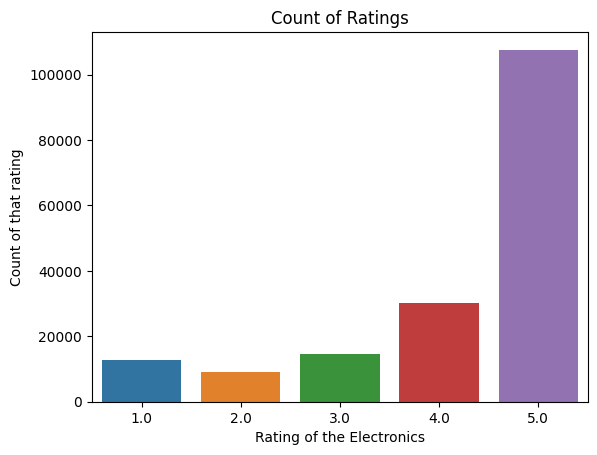

In [50]:

palette = sns.color_palette("tab10", n_colors=9)

sns.countplot(x="rating", data=df, palette=palette, legend=False, hue='rating')
plt.title("Count of Ratings")
plt.xlabel("Rating of the Electronics")
plt.ylabel("Count of that rating")


In [36]:
df['rating'].value_counts()

rating
5.0    107593
4.0     30104
3.0     14593
1.0     12652
2.0      9182
Name: count, dtype: int64

In [37]:
# the distribution of sales by year

C:\Users\Vaibhav\AppData\Local\Temp\ipykernel_6548\3633932233.py:3: UserWarning: 
The palette list has fewer values (9) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x="year", data=df ,palette=palette, legend= False, hue="year")


<Axes: xlabel='year', ylabel='count'>

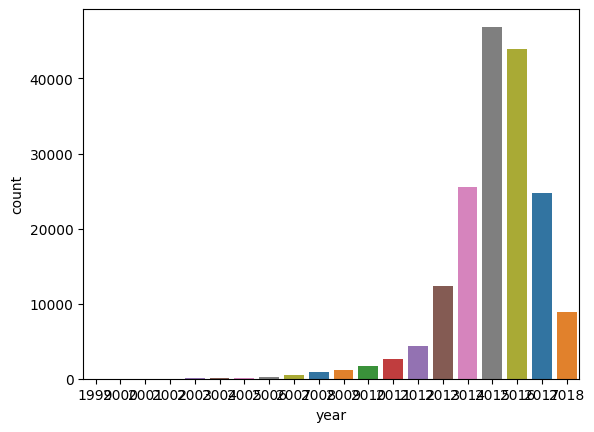

In [51]:
#palette = sns.color_palette("coolwarm", as_cmap = False)

sns.countplot(x="year", data=df ,palette=palette, legend= False, hue="year")



In [ ]:
# brands with the most sales



C:\Users\Vaibhav\AppData\Local\Temp\ipykernel_6548\4010065704.py:2: UserWarning: 
The palette list has fewer values (9) than needed (51) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x='brand',hue="brand",legend=False, data=df, order=df['brand'].value_counts().iloc[1:10].index, palette=palette)


([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Logitech'),
  Text(1, 0, 'Bose'),
  Text(2, 0, 'Sony'),
  Text(3, 0, 'EldHus'),
  Text(4, 0, 'Mpow'),
  Text(5, 0, 'Fujifilm'),
  Text(6, 0, 'TaoTronics'),
  Text(7, 0, 'Sennheiser'),
  Text(8, 0, 'Etre Jeune')])

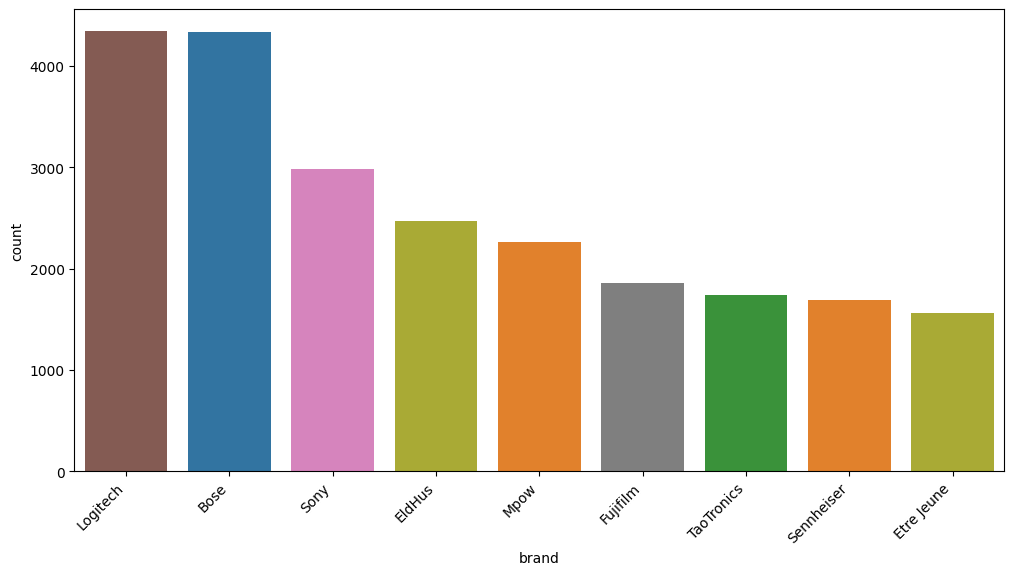

In [52]:
plt.figure(figsize=(12,6))
sns.countplot(x='brand',hue="brand",legend=False, data=df, order=df['brand'].value_counts().iloc[1:10].index, palette=palette)
plt.xticks(rotation=45, ha='right', fontsize=10)

<Axes: >

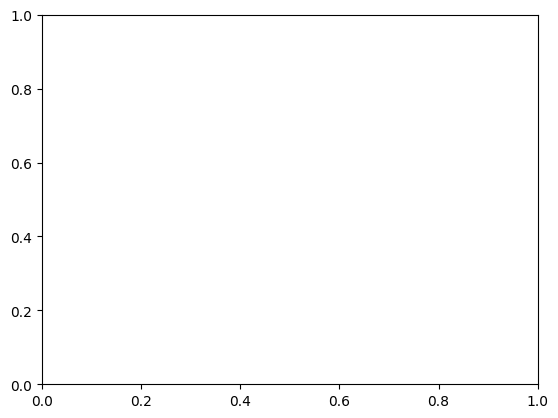

In [54]:
sns.countplot(x='brand', data=df[df['year']==2026],order=df['year'].value_counts().iloc[1:10].index)

C:\Users\Vaibhav\AppData\Local\Temp\ipykernel_6548\3870035653.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="category", data=df, order=df['category'].value_counts().iloc[-10:].index,palette=palette)
C:\Users\Vaibhav\AppData\Local\Temp\ipykernel_6548\3870035653.py:5: UserWarning: 
The palette list has fewer values (9) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x="category", data=df, order=df['category'].value_counts().iloc[-10:].index,palette=palette)


<Axes: xlabel='category', ylabel='count'>

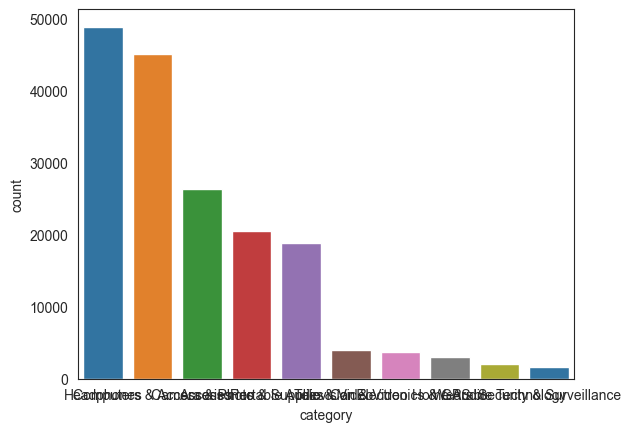

In [59]:
# Category with the least sales



sns.countplot(x="category", data=df, order=df['category'].value_counts().iloc[-10:].index,palette=palette)

In [ ]:
# distribution of sales presented in a pie chart

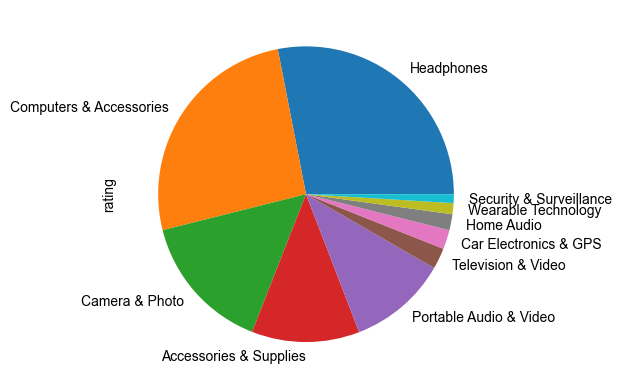

In [56]:
df['category'].value_counts(normalize=True)
df.groupby('category')['rating'].count().sort_values(ascending=False).head(10).plot(kind='pie')
sns.set_style('white')